In [1]:
#import libraries
import numpy as np
import pandas as pd

import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from autocorrect import Speller #correcting the spellings
 

In [2]:
#import dataset
df = pd.read_csv('C:/Users/Sanjana/Downloads/1429_1/1429_1.csv')

#Keeping only important columns for analysis
df = df.iloc[:,[17,16,14,11]]

C:\Users\Sanjana\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Checking for null or missing values
df.isna().sum()

reviews.title            5
reviews.text             1
reviews.rating          33
reviews.doRecommend    594
dtype: int64

In [4]:
# Removing missing data
df = df.dropna(axis = 0,how = 'any')


df.isna().sum()

reviews.title          0
reviews.text           0
reviews.rating         0
reviews.doRecommend    0
dtype: int64

In [5]:
df.head()

,reviews.title,reviews.text,reviews.rating,reviews.doRecommend
0,Kindle,This product so far has not disappointed. My c...,5.0,True
1,very fast,great for beginner or experienced person. Boug...,5.0,True
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,True
3,Good!!!,I've had my Fire HD 8 two weeks now and I love...,4.0,True
4,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,5.0,True


In [6]:
#Splitting the dataset to training and test for later
from sklearn.model_selection import train_test_split
X=df['reviews.text']
y=df['reviews.rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
#EDA
#to get a better understanding of the dataset
df['reviews.rating'].value_counts()

5.0    23385
4.0     8469
3.0     1470
2.0      382
1.0      356
Name: reviews.rating, dtype: int64

In [8]:
train_1 = df.iloc[:, :-1]

In [9]:
#Adding a new column to get the length of the phrases
train_1['Length'] = train_1['reviews.text'].apply(len)

In [10]:
#Importing librarires for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl 

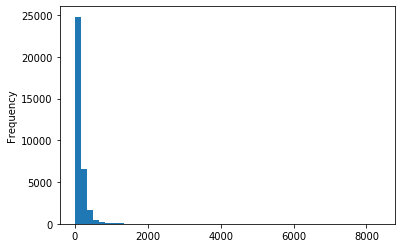

In [11]:
train_1['Length'].plot(kind = 'hist' , bins = 50) 

Text(0.5, 0.98, 'Length via each Rating')

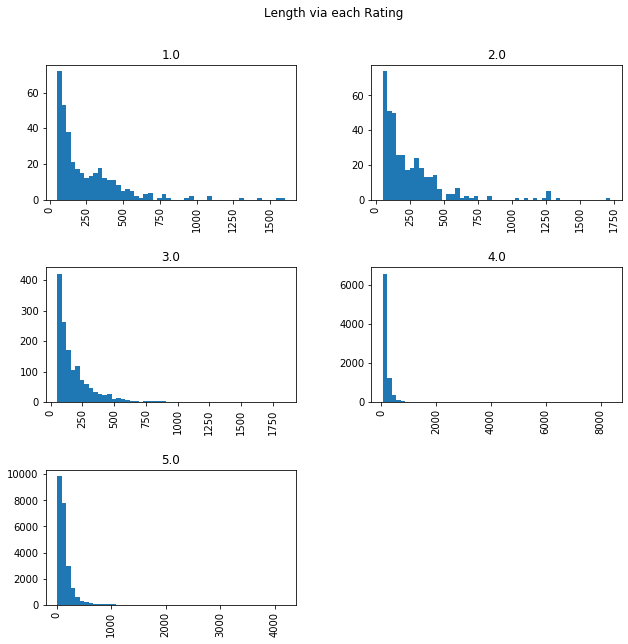

In [12]:
#Histogram of the length of phrase via each rating
ax = train_1.hist(column = 'Length', by = 'reviews.rating', bins = 50 , figsize = (10,10));
pl.suptitle('Length via each Rating')

In [13]:
#Tokenization - splitting strings into a list of words
def word_tokenize(text):
        """
        :param text:
        :return: list of words
        """
        return nltk.word_tokenize(text) 


In [14]:
def autospell(text):
        """
        correct the spelling of the word.
        """
        spells = [spell(w) for w in (nltk.word_tokenize(text))]
        return " ".join(spells)

In [15]:
#Removing numbers because they do not contain any information particularly for this dataset
def remove_numbers(text):
        """
        take string input and return a clean text without numbers.
        Use regex to discard the numbers.
        """
        output = ''.join(c for c in text if not c.isdigit())
        return output 

In [16]:
#Removing ounctuations as they do not have any important meaning either
def remove_punct(text):
  
        return ''.join(c for c in text if c not in punctuation) 

In [17]:
#Removing stopwords(words which do not contain much meaning and do not help in Sentiment analysis viz. we, my, you, ours, me, etc.)
def remove_stopwords(sentence):
        """
        removes all the stop words like "is,the,a, etc."
        """
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])
    


In [18]:
#Normalizing using Lemmatization.
#Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .
def lemmatize(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for word in nltk.word_tokenize(text)]
    return " ".join(lemmatized_word) 

In [31]:
#Combining everything into a single function for pre-processing the data
def preprocess(text):
        word_tokens = word_tokenize(text)
        word_list = []
        for each_sent in word_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = remove_numbers(lemmatizzed_sent)
            clean_text = remove_punct(clean_text)
            clean_text = remove_stopwords(clean_text)
            word_tokens = word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

In [32]:
#Transforming the data
#1. using CountVectorizer. 
#CountVectorizer transforms a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(analyzer=preprocess) 


In [33]:
#2. using TfidfTransformer
#Transforms a count matrix to a normalized tf or tf-idf representation. Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

In [34]:
#using the Multinomial Naive Bayes model available in sklearn 
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()


In [35]:
#Combining all the steps into a machine learning pipeline 
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('cv', cv),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [36]:
#Fitting the pipeline on the training text and ratings
pipeline.fit(X_train,y_train) 


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer=<function preprocess at 0x000002B4C8DDA3A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [37]:
#Getting the accuracy
pipeline.score(X_train, y_train) 

0.7049799992660281

In [40]:
#Test set
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)

print('accuracy',accuracy_score(y_test, y_pred))

accuracy 0.6923528548363422
